# ML for AIR

In [3]:
import pandas as pd
import numpy as np
import string as str
from datetime import datetime
import sys
import statsmodels.api as sm
#import pmdarima as pm
import matplotlib.pyplot as plt

#from pmdarima import auto_arima


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [6]:

path = r"D:\OneDrive - Wipro\Desktop\AIR\\"
infile =  path + "AIR_A2_today_SS1.csv"

#table = pd.read_csv(infile, engine='python',sep=',', quotechar='"', error_bad_lines=False)

table_chunk = pd.read_csv(infile, engine='python', sep=',', chunksize=2000000)
table = pd.concat(list(table_chunk))

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

table.head()

,LOAD_DATE,DEMAND_GUID,PROJECT_NUMBER,PROJECT_NAME,PROJECT_DESCRIPTION,CUSTOMER_NO,CUSTOMER_NAME,CUSTOMER_SUB_GEO,ORG_UNIT,ORG_UNTI_NAME,...,SOW_NO,ORDER_STATUS,FPP_TNM,SMU_DESCRIPTION,SAP_PRACTICE_DESCRIPTION,EXECUTION_HUB_DESCRIPTION,GBL,GBL_EH,DERIVED_EH,DERIVED_EH_SECTOR
0,2021-05-19,00163E3465831EDBA8B7CCDCF4D769A3,229783,CADRE_A2_DAAI,CADRE_A2_DAAI,NaN,Internal Project,NaN,941300.0,DAAI-IM-DATA INTEGRATION,...,NaN,OPPURTUNITY AT RISK,OPPURTUNITY AT RISK,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-APPS & DATA,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS,IDEAS,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-EH- GROUP- AMERICAS 2
1,2021-05-19,00163E386DB31EDBA6A060A00A2E7593,229783,CADRE_A2_DAAI,CADRE_A2_DAAI,NaN,Internal Project,NaN,941300.0,DAAI-IM-DATA INTEGRATION,...,NaN,OPPURTUNITY AT RISK,OPPURTUNITY AT RISK,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-APPS & DATA,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS,IDEAS,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-EH- GROUP- AMERICAS 2
2,2021-05-19,00163E7E9D8E1EEBAC9DF43B05EA6296,229783,CADRE_A2_DAAI,CADRE_A2_DAAI,NaN,Internal Project,NaN,941300.0,DAAI-IM-DATA INTEGRATION,...,NaN,OPPURTUNITY AT RISK,OPPURTUNITY AT RISK,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-APPS & DATA,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS,IDEAS,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-EH- GROUP- AMERICAS 2
3,2021-05-19,00163E3465831EEBA5C7C778EAFEA4C3,229783,CADRE_A2_DAAI,CADRE_A2_DAAI,NaN,Internal Project,NaN,940636.0,DATA ACQUISITION & STORAG,...,NaN,OPPURTUNITY AT RISK,OPPURTUNITY AT RISK,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-APPS & DATA,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS,IDEAS,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-EH- GROUP- AMERICAS 2
4,2021-05-19,00163E6E1B9B1EDBACE0D0B263D26F6B,229783,CADRE_A2_DAAI,CADRE_A2_DAAI,NaN,Internal Project,NaN,940636.0,DATA ACQUISITION & STORAG,...,NaN,OPPURTUNITY AT RISK,OPPURTUNITY AT RISK,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-APPS & DATA,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS,IDEAS,IDEAS-EXECUTION HUB- AMERICAS 2,IDEAS-EH- GROUP- AMERICAS 2


In [7]:
table.describe()

,PROJECT_NUMBER,CUSTOMER_NO,ORG_UNIT,TM_ID,PM_ID,NO_OF_RESOURCES,PROPOSED,SELECTED,ALLOCATED,OPEN_POS,...,LCA_NUMBER,AMENDMENT_SLOTS,EXTENSION_AMENDMENT_SLOTS,ZZCRMREFNO,SEC_RM1_NO,SEC_RM2_NO,SEC_RM3_NO,IND_DR_FL_Y,GRP_CUST_CODE,SOW_NO
count,24227.000000,2.356900e+04,2.422600e+04,2.422700e+04,2.422700e+04,24227.000000,24227.000000,24227.000000,24227.000000,24227.000000,...,1.252000e+03,1252.000000,1252.000000,2.356900e+04,24227.000000,2.422700e+04,24227.000000,24227.000000,2.356700e+04,2.356700e+04
mean,210796.647005,2.482188e+04,9.556982e+05,1.849727e+06,2.930779e+06,1.089652,0.480621,0.201882,0.384984,0.704668,...,1.651146e+08,1.185304,1.185304,5.380619e+07,1066.863582,1.175177e+03,95.454741,0.341190,5.203923e+06,2.028605e+07
std,32037.790674,9.382645e+04,4.656495e+04,5.486638e+06,6.698317e+06,0.860425,0.534906,0.401413,0.487025,1.018606,...,7.397467e+07,1.237894,1.237894,3.928342e+06,15655.618096,1.293618e+05,3661.779413,0.474119,5.470525e+03,9.134463e+06
min,0.000000,6.700000e+01,3.089190e+05,1.104100e+04,1.293900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.020350e+05,0.000000,0.000000,4.001702e+07,0.000000,0.000000e+00,0.000000,0.000000,5.200006e+06,0.000000e+00
25%,205461.000000,4.623000e+03,9.424500e+05,1.030260e+05,1.550480e+05,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.020142e+08,1.000000,1.000000,5.017855e+07,0.000000,0.000000e+00,0.000000,0.000000,5.200701e+06,2.005391e+07
50%,223108.000000,1.255000e+04,9.493330e+05,1.429340e+05,2.861350e+05,1.000000,0.000000,0.000000,0.000000,1.000000,...,2.020189e+08,1.000000,1.000000,5.024441e+07,0.000000,0.000000e+00,0.000000,0.000000,5.201638e+06,2.009172e+07
75%,229563.000000,2.619700e+04,9.555900e+05,2.779050e+05,8.038130e+05,1.000000,1.000000,0.000000,1.000000,1.000000,...,2.020206e+08,1.000000,1.000000,5.803244e+07,0.000000,0.000000e+00,0.000000,1.000000,5.204230e+06,2.802067e+07
max,232487.000000,2.000171e+06,1.061594e+06,2.021030e+07,2.021635e+07,40.000000,13.000000,1.000000,2.000000,40.000000,...,2.020218e+08,17.000000,17.000000,5.807698e+07,558709.000000,2.009221e+07,388241.000000,1.000000,5.218774e+06,7.100350e+07


In [8]:
df = table[['INDENT_CREATED_ON','TOTAL_REQUIRED']]

In [10]:
df.head()

,INDENT_CREATED_ON,TOTAL_REQUIRED
0,2021-04-20,1
1,2021-04-09,1
2,2021-05-09,1
3,2021-04-06,1
4,2021-05-12,1


In [11]:
df.describe()

,TOTAL_REQUIRED
count,24227.000000
mean,1.420811
std,1.249731
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,40.000000


In [12]:
df.rename(columns={'INDENT_CREATED_ON': 'Date'}, inplace=True)
df.rename(columns={'TOTAL_REQUIRED': 'Total'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24227 entries, 0 to 24226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    24227 non-null  object
 1   Total   24227 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 378.7+ KB


In [13]:
df.head()

,Date,Total
0,2021-04-20,1
1,2021-04-09,1
2,2021-05-09,1
3,2021-04-06,1
4,2021-05-12,1


In [14]:
df['Date'] = pd.to_datetime(df.Date)
#df.head()
#meandf = df['Total'].mean(skipna=True)
#df=df.replace(0,meandf) 
#df['Total'] = df['Total'].replace(['0'],np.average(df['Total']))
df.head()

,Date,Total
0,2021-04-20,1
1,2021-04-09,1
2,2021-05-09,1
3,2021-04-06,1
4,2021-05-12,1


In [15]:
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['2021-04-20', '2021-04-09', '2021-05-09', '2021-04-06',
               '2021-05-12', '2021-04-28', '2021-04-19', '2021-04-06',
               '2021-04-06', '2021-04-28',
               ...
               '2021-04-13', '2021-04-02', '2021-04-02', '2021-04-02',
               '2021-04-22', '2021-05-06', '2021-05-04', '2021-04-14',
               '2021-04-22', '2021-04-22'],
              dtype='datetime64[ns]', name='Date', length=24227, freq=None)

In [ ]:
df.asfreq('d').index # Setting the freq of series to Daily 'd'

In [25]:
df = df.sort_index()
df = df['2021-04-01':'2021-12-31'].resample('M').sum()
df.head()

,Total
Date,
2021-04-30,21699
2021-05-31,12723


In [26]:
tdf = df['Total'] # copy of Dataframe
tdf



Date
2021-04-30    21699
2021-05-31    12723
Freq: ME, Name: Total, dtype: int64

In [27]:
tdf.to_csv("test.csv")

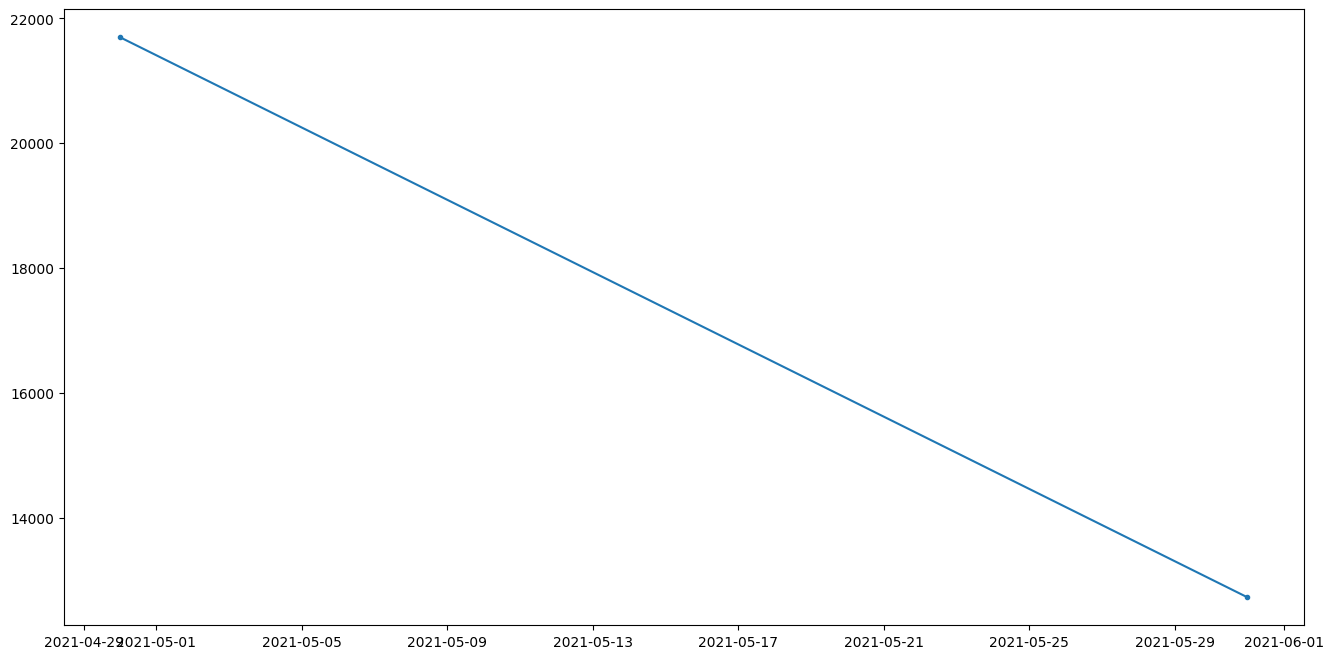

In [28]:
plt.figure(figsize=(16,8))
plt.plot(tdf, label='Open Position Trend', marker='.')

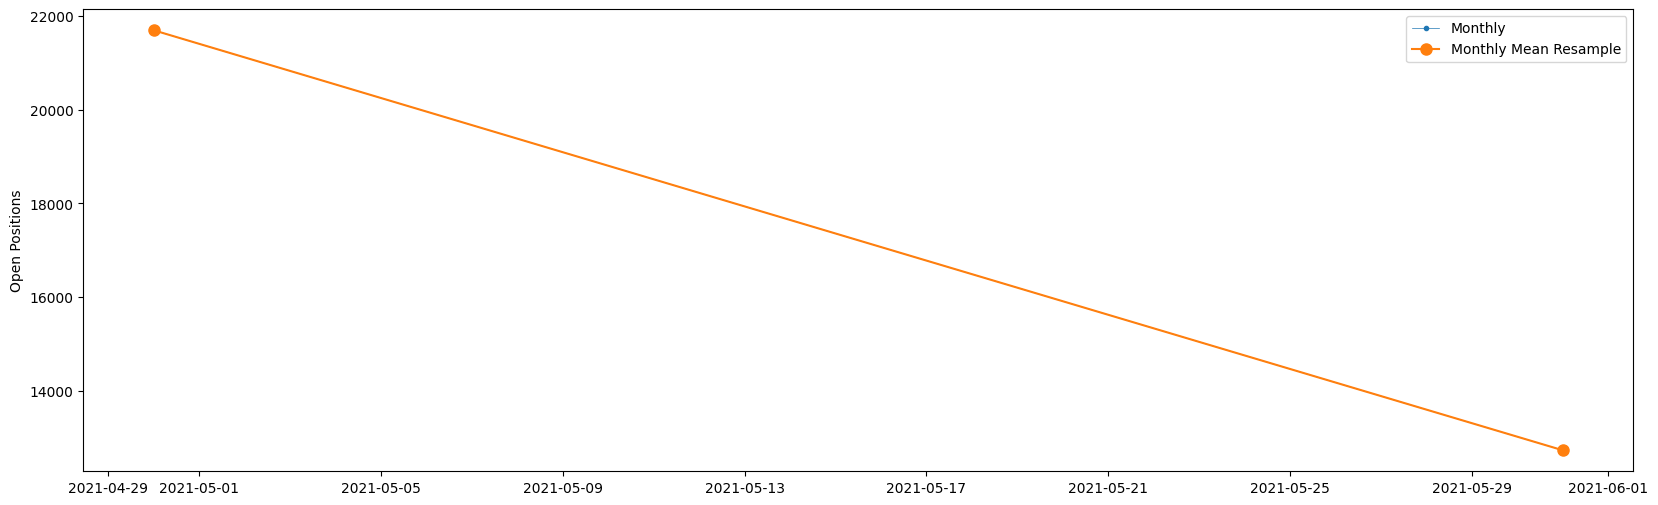

In [29]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(tdf,marker='.', linestyle='-', linewidth=0.5, label='Monthly')
ax.plot(tdf.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('Open Positions')
ax.legend()

In [30]:
#from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(timeseries, period = int(len(tdf)/2), model = "additive")  
#figure = plt.figure()  
#figure = decomposition.plot()  
#figure.set_size_inches(15, 8
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model ='additive',extrapolate_trend='freq', period=91)
    fig = decomposition.plot()
    fig.set_size_inches(24,8)
    plt.show()

In [31]:
seasonal_decompose(tdf)

ValueError: x must have 2 complete cycles requires 182 observations. x only has 2 observation(s)

In [37]:
#plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    timeseries.rolling(4).mean().plot(label='4 Weeks Rolling Mean')
    timeseries.rolling(8).std().plot(label='8 Weeks Rolling Std')
    timeseries.plot()
    plt.legend()

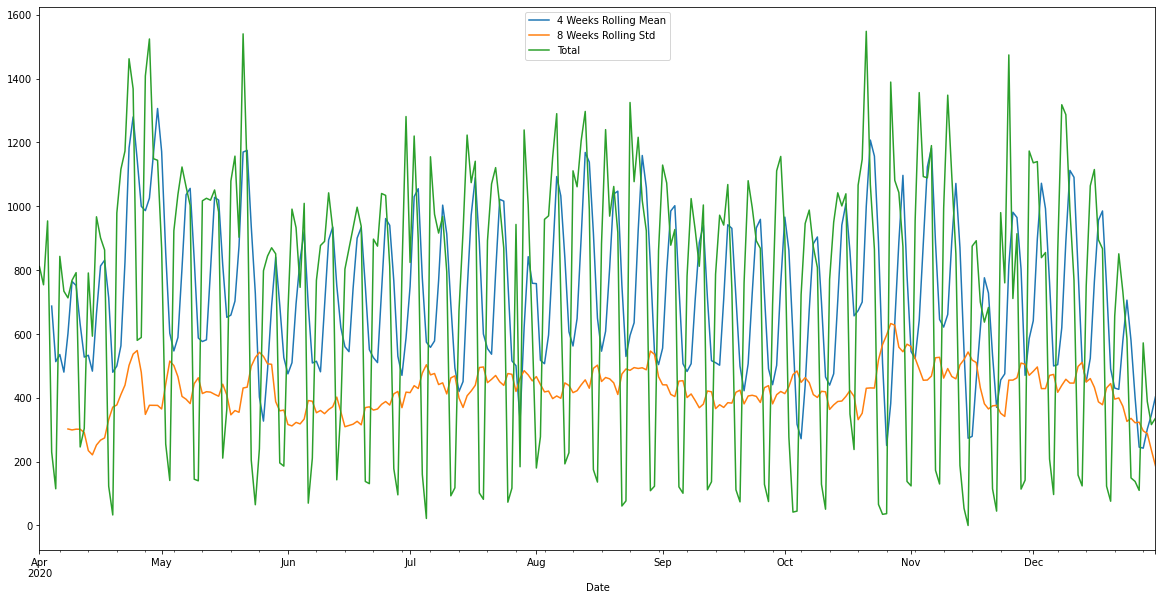

In [38]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(tdf,'raw data')

In [20]:
from statsmodels.tsa.stattools import adfuller

"""
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

    for value,label in zip(test_result,labels):
        print(label)
        print(value)
        #print (value)
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary ")
"""
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    test_result = adfuller(timeseries.dropna(),autolag='AIC')
    print ('ADF Test:')
    print('Test statistic = {:.3f}'.format(test_result[0]))
    print('P-value = {:.3f}'.format(test_result[1]))
    print('Critical values :')
    for k, v in test_result[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<test_result         [0] else '', 100-int(k[:-1])))

In [21]:
ADF_test(tdf,'raw data')

 > Is the raw data stationary ?
ADF Test:
Test statistic = -2.953
P-value = 0.039
Critical values :
	1%: -3.4558530692911504 - The data is not stationary with 99% confidence
	5%: -2.872764881778665 - The data is  stationary with 95% confidence
	10%: -2.572751643088207 - The data is  stationary with 90% confidence


 > Is the de-trended data stationary ?
ADF Test:
Test statistic = -5.176
P-value = 0.000
Critical values :
	1%: -3.4564641849494113 - The data is  stationary with 99% confidence
	5%: -2.873032730098417 - The data is  stationary with 95% confidence
	10%: -2.572894516864816 - The data is  stationary with 90% confidence


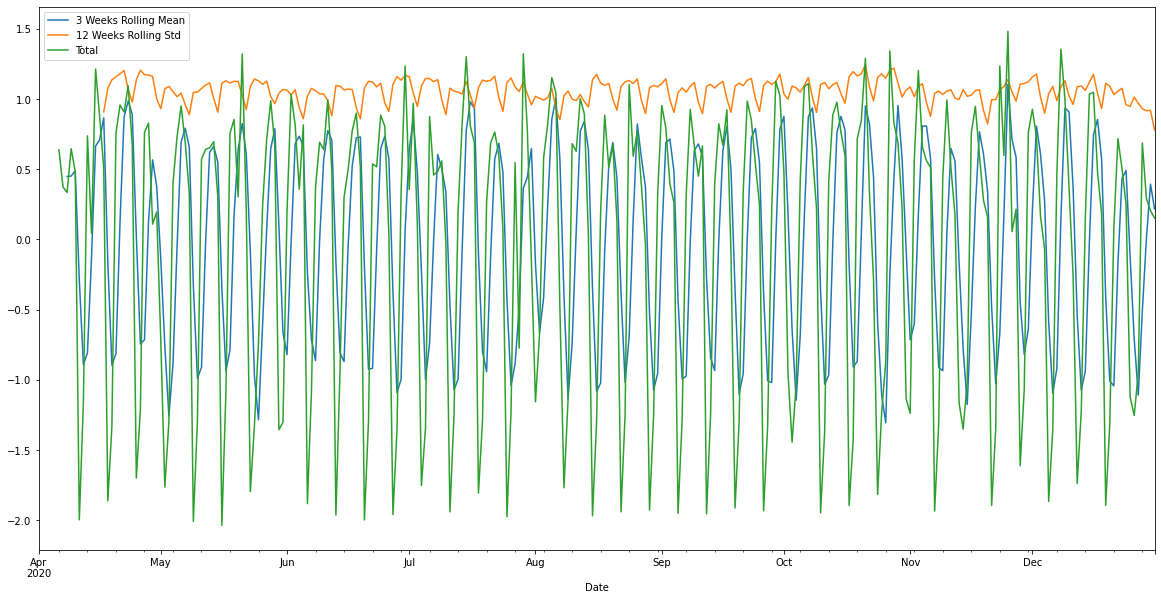

In [22]:
# Detrending
tdf_detrend =  (tdf - tdf.rolling(window=6).mean())/tdf.rolling(window=6).std()
test_stationarity(tdf_detrend,'de-trended data')
ADF_test(tdf_detrend,'de-trended data')

 > Is the 4 lag differenced data stationary ?
ADF Test:
Test statistic = -5.493
P-value = 0.000
Critical values :
	1%: -3.4558530692911504 - The data is  stationary with 99% confidence
	5%: -2.872764881778665 - The data is  stationary with 95% confidence
	10%: -2.572751643088207 - The data is  stationary with 90% confidence


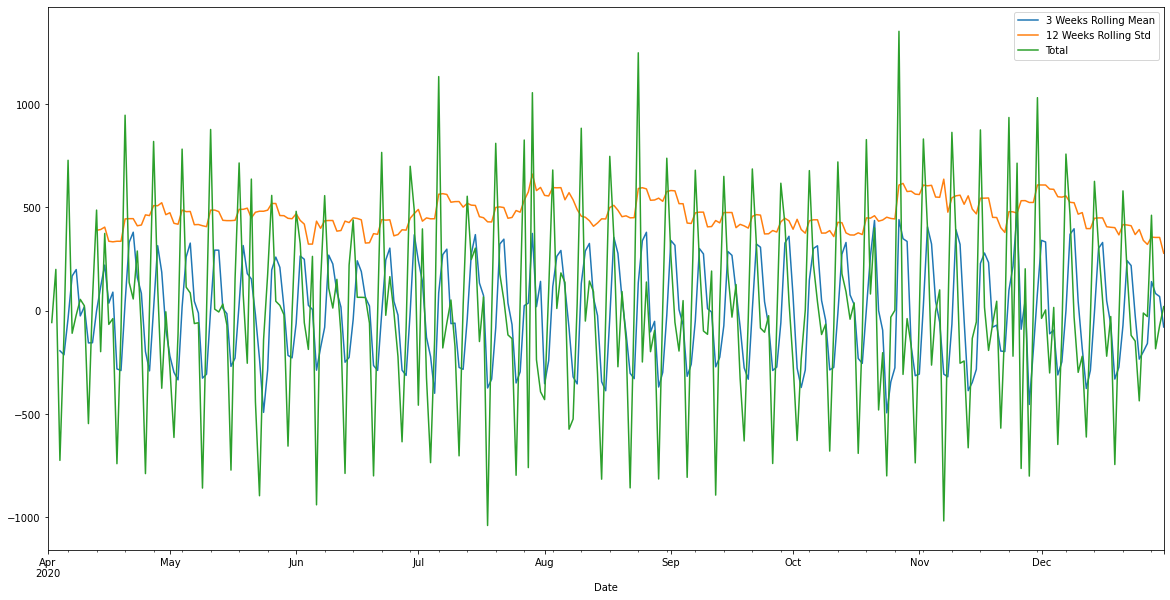

In [23]:
# Differencing
tdf_4lag =  tdf - tdf.shift(1)

test_stationarity(tdf_4lag,'4 lag differenced data')
ADF_test(tdf_4lag,'4 lag differenced data')

 > Is the 4 lag differenced de-trended data stationary ?
ADF Test:
Test statistic = -8.882
P-value = 0.000
Critical values :
	1%: -3.4568881317725864 - The data is  stationary with 99% confidence
	5%: -2.8732185133016057 - The data is  stationary with 95% confidence
	10%: -2.5729936189738876 - The data is  stationary with 90% confidence


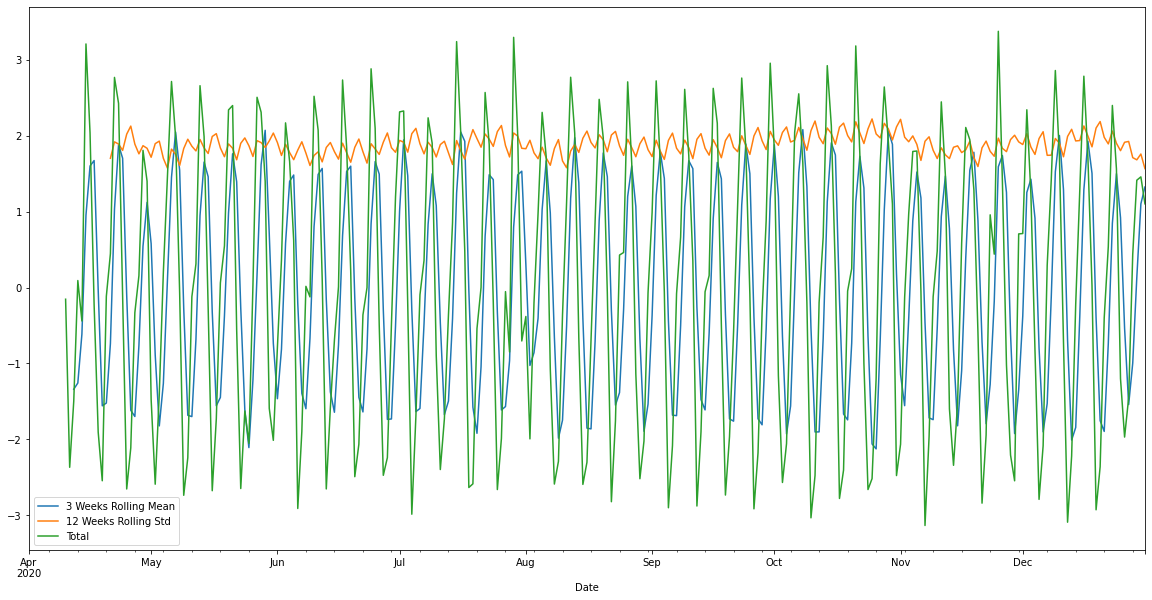

In [24]:
# Detrending + Differencing
tdf_4lag_detrend =  tdf_detrend - tdf_detrend.shift(4)
test_stationarity(tdf_4lag_detrend,'4 lag differenced de-trended data')
ADF_test(tdf_4lag_detrend,'4 lag differenced de-trended data')

In [25]:
y_to_train = tdf[:'2020-10-01'] # dataset to train
y_to_val = tdf['2020-10-01':] # last X months for test  
predict_date = len(tdf) - len(tdf[:'2020-12-31']) # the number of data points for the test set
#y_to_val.head()
#y_to_train.head()

In [26]:
import itertools

def sarima_grid_search(tdf,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(tdf,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [27]:
sarima_grid_search(tdf,12)

The set of parameters with the minimum AIC is: SARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:3665.061122785766


In [28]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                #enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(15, 12))
    #results.plot_diagnostics()

    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     48.845     -0.020      0.984     -96.735      94.735
ar.S.L12      -0.2474      0.097     -2.539      0.011      -0.438      -0.056
ma.S.L12      -1.0000     48.851     -0.020      0.984     -96.746      94.746
sigma2      1.604e+05      0.000   5.26e+08      0.000     1.6e+05     1.6e+05


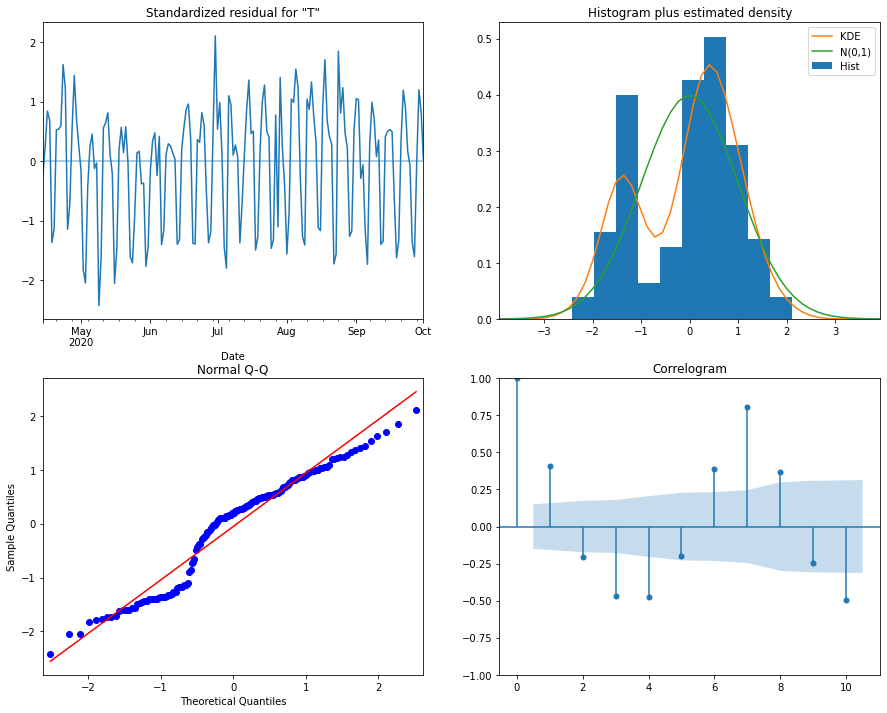

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False nan


TypeError: invalid type promotion

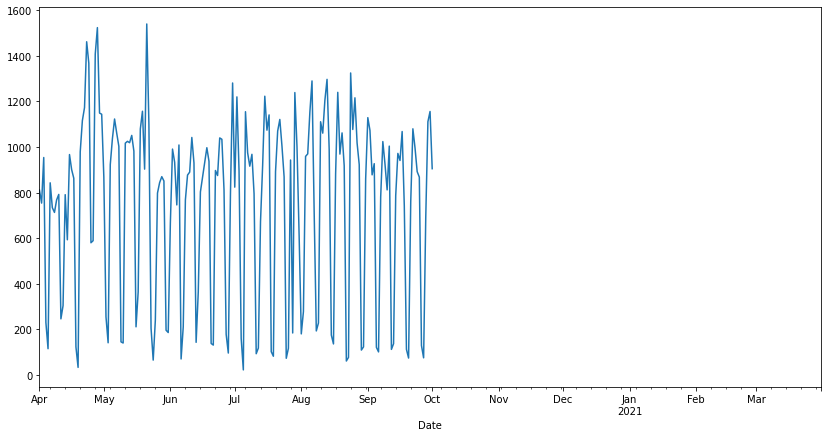

In [39]:
# No need to run this!!!!
model = sarima_eva(y_to_train,(0, 1, 1),(1, 1, 1, 12),12,'2021-03-31',y_to_val)

In [40]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

In [41]:
model = sm.tsa.statespace.SARIMAX(y_to_train.dropna(),order=(0,1,1), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Total   No. Observations:                  184
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1297.420
Date:                            Wed, 15 Sep 2021   AIC                           2602.841
Time:                                    20:53:35   BIC                           2615.408
Sample:                                04-01-2020   HQIC                          2607.940
                                     - 10-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0321      0.101      0.319      0.750      -0.165       0.230
ar.S.L12      -0.3060      0.084   

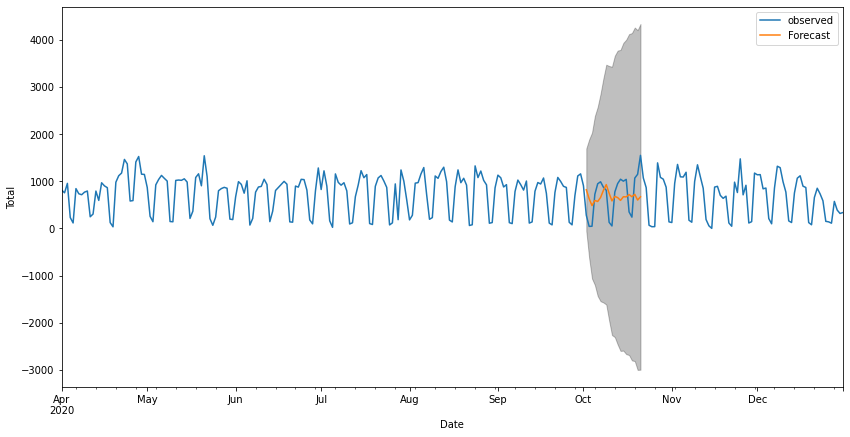

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2020-10-02,819.07015745,-55.32245899,1693.46277389
1,2020-10-03,628.72542421,-627.86897618,1885.31982460
2,2020-10-04,483.16762476,-1063.92505055,2030.26030007
3,2020-10-05,591.02329964,-1200.05514896,2382.10174825
4,2020-10-06,570.53910231,-1435.06012788,2576.13833249
5,2020-10-07,654.59827054,-1544.69582875,2853.89236983
6,2020-10-08,805.42597711,-1571.83311652,3182.68507073
7,2020-10-09,927.74719489,-1615.05180274,3470.54619253
8,2020-10-10,745.22910542,-1952.91643929,3443.37465013
9,2020-10-11,582.34033132,-2262.15563060,3426.83629324


In [42]:
final_table = forecast(ARIMAresult,20,tdf)
final_table.head(15)

In [43]:
PredictionResults = ARIMAresult.predict(0, len(tdf)+2, typ ='levels').rename('Sarima Predictions')
PredictionResults

2020-04-01     0.00000000
2020-04-02   816.51554191
2020-04-03   753.29825929
2020-04-04   956.25300096
2020-04-05   221.84736159
                 ...     
2020-12-30   715.20322265
2020-12-31   657.50674210
2021-01-01   738.50845686
2021-01-02   743.35119968
2021-01-03   716.82352415
Freq: D, Name: Sarima Predictions, Length: 278, dtype: float64

In [44]:
#df['forecast_data'] = ARIMAresult.predict(start = 150, end= 168, dynamic= True)
#df [['Total','forecast_data']]. plot (figsize= (12,8))
ARIMAtable = pd.Series(ARIMAresult.fittedvalues, copy=True)
ARIMAresult.fittedvalues

Date
2020-04-01      0.00000000
2020-04-02    816.51554191
2020-04-03    753.29825929
2020-04-04    956.25300096
2020-04-05    221.84736159
                  ...     
2020-09-27    169.82030317
2020-09-28     44.11190760
2020-09-29    605.63610365
2020-09-30   1347.01914409
2020-10-01   1265.15995838
Freq: D, Length: 184, dtype: float64

Text(0.5, 1.0, 'RMSE: 719.0250')

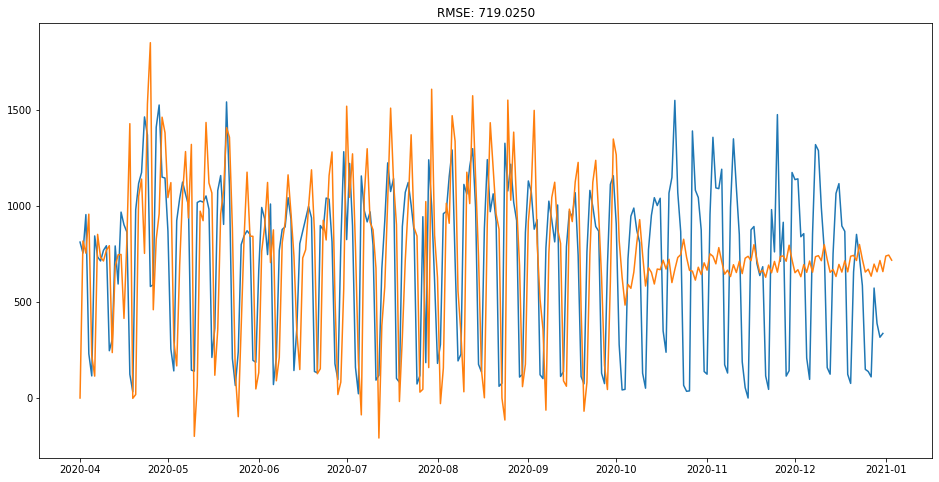

In [45]:
plt.figure(figsize=(16,8))
plt.plot(tdf)
plt.plot(PredictionResults)
plt.title('RMSE: %.4f'% np.sqrt(sum((ARIMAtable)**2)/len(tdf)))

In [46]:
# Auto ARIMA
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                              start_p = 0,
                              start_q = 0,
                              start_d = 0,
                              max_d = 8,
                              max_p = 8,
                              max_q = 8,
                              test = 'adf',
                              start_P = 0,
                              start_Q = 0,
                              start_D = 0,
                              max_P = 8,
                              max_Q = 8,
                              max_D = 8,
                              stepwise= True,
                              seasonal = True,
                              trace = True,
                              m=12)
    return automodel

In [47]:
arimamodel(tdf)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4128.543, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4105.958, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4126.549, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4130.387, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=4066.671, Time=0.98 sec
 ARIMA(1,1,0)(3,0,0)[12] intercept   : AIC=4066.088, Time=3.33 sec
 ARIMA(1,1,0)(4,0,0)[12] intercept   : AIC=4041.622, Time=5.89 sec
 ARIMA(1,1,0)(5,0,0)[12] intercept   : AIC=4039.918, Time=10.36 sec
 ARIMA(1,1,0)(6,0,0)[12] intercept   : AIC=inf, Time=46.32 sec
 ARIMA(1,1,0)(5,0,1)[12] intercept   : AIC=3981.262, Time=18.36 sec
 ARIMA(1,1,0)(4,0,1)[12] intercept   : AIC=4042.732, Time=13.91 sec
 ARIMA(1,1,0)(6,0,1)[12] intercept   : AIC=3916.393, Time=78.24 sec
 ARIMA(1,1,0)(7,0,1)[12] intercept   : AIC=3886.571, Time=222.77 sec
 ARIMA(1,1,0)(7,0,0)[1

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(7, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
import pickle
pickle.dump(ARIMAresult, open('model.pkl','wb'))

In [ ]:
print(pm.auto_arima(tdf.dropna(),seasonal=True, m=12, test = 'adf').summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -317.425
Date:                Thu, 02 Sep 2021   AIC                            638.850
Time:                        22:19:17   BIC                            642.125
Sample:                             0   HQIC                           640.015
                                 - 40                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9094      0.168     -5.428      0.000      -1.238      -0.581
sigma2      1.013e+06   2.36e+05      4.300      0.000    5.51e+05    1.47e+06
Ljung-Box (L1) (Q):                   1.15   Jarque-

In [ ]:
x = len(tdf)*(80/100)
x

32.0

In [ ]:
y_to_train = tdf.iloc[:(int)(len(df)*(80/100))]
y_to_val = tdf.iloc[:(int)(len(df)*(20/100))]

In [ ]:
model = sm.tsa.statespace.SARIMAX(tdf.dropna(),order=(3,3,0), seasonal_order=(0,0,0,12))

In [ ]:
results = model.fit()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   40
Model:               SARIMAX(3, 3, 0)   Log Likelihood                -310.266
Date:                Thu, 02 Sep 2021   AIC                            628.531
Time:                        22:20:41   BIC                            634.975
Sample:                    04-05-2020   HQIC                           630.803
                         - 01-03-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5049      0.127    -11.838      0.000      -1.754      -1.256
ar.L2         -1.3570      0.171     -7.949      0.000      -1.692      -1.022
ar.L3         -0.5892      0.135     -4.371      0.0

In [ ]:
start = len(y_to_train)

In [ ]:
end = start + len(y_to_val) - 1

In [ ]:
PredictionResults = results.predict(0, len(tdf)+1, typ ='levels').rename('Sarima Predications')

<AxesSubplot:xlabel='Date'>

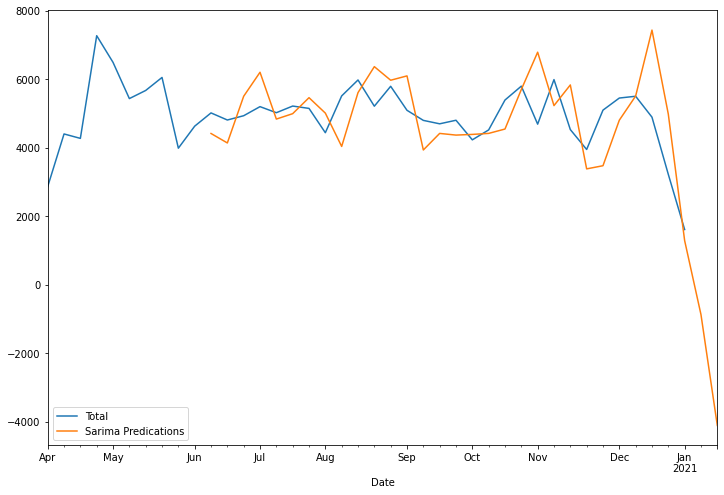

In [ ]:
tdf.plot(legend=True,figsize=(12,8))
PredictionResults[10:].plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(y_to_val,PredictionResults)
error

ValueError: operands could not be broadcast together with shapes (8,) (42,) 